In [ ]:
# Libraries applying in the present project
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
unemployment = pd.read_csv("https://raw.githubusercontent.com/JHOMASA/Unemployment_prediction/main/unemployment.csv")
unemployment.head()

,Date,Calgary CER Unemployment rate (%),Alberta Unemployment Rate (%),Canada Unemployment rate (%),Calgary (CMA) Average Hourly Wage Rate ($),City of Calgary Building Permits Residential Value ($),City of Calgary Building Permits Non-Residential Value ($),Calgary (City) Total Housing Starts (units),Calgary (CMA) Total Housing Starts (units),Calgary (CER) Retail Sales ($billions),Calgary (CMA) Inflation Rate (%change)
0,2024-03,0.06,0.06,0.06,37.17,"1,199,424,535.47","568,063,465.48","4,354","5,385",NaN,0.05
1,2022-08,0.06,0.06,0.06,35.51,"2,806,818,863.98","1,211,523,912.51","9,546","11,186",26.84,0.07
2,2022-09,0.06,0.06,0.06,35.54,"3,093,935,845.24","1,464,589,773.02","10,938","12,865",30.32,0.07
3,2022-10,0.06,0.06,0.05,35.64,"3,427,435,541.85","1,546,904,050.13","12,365","14,553",33.87,0.07
4,2022-11,0.06,0.06,0.05,35.75,"3,725,734,013.69","1,628,045,619.91","13,866","16,226",37.43,0.07


In [ ]:
# filter the columns which would be analysed
Unemployment_rate = unemployment[["Date","Calgary CER Unemployment rate (%)", "Alberta Unemployment Rate (%)", 'Canada Unemployment rate (%)']]
Unemployment_rate

,Date,Calgary CER Unemployment rate (%),Alberta Unemployment Rate (%),Canada Unemployment rate (%)
0,2024-03,0.06,0.06,0.06
1,2022-08,0.06,0.06,0.06
2,2022-09,0.06,0.06,0.06
3,2022-10,0.06,0.06,0.05
4,2022-11,0.06,0.06,0.05
5,2022-12,0.06,0.06,0.05
6,2023-01,0.06,0.06,0.05
7,2023-02,0.07,0.06,0.05
8,2023-03,0.07,0.06,0.05
9,2023-04,0.07,0.06,0.05


In [ ]:
#Identifiing the sort of data from each column
Unemployment_rate.dtypes

Date                                  object
Calgary CER Unemployment rate (%)    float64
Alberta Unemployment Rate (%)        float64
Canada Unemployment rate (%)         float64
dtype: object

In [ ]:
def date_time(df):
    df["date"] = pd.to_datetime(df["Date"], errors = "coerce")
    return df["date"]

In [ ]:
date_time(Unemployment_rate)

<ipython-input-23-b71cd9ba0def>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["Date"], errors = "coerce")


date
2024-03-01   2024-03-01
2022-08-01   2022-08-01
2022-09-01   2022-09-01
2022-10-01   2022-10-01
2022-11-01   2022-11-01
2022-12-01   2022-12-01
2023-01-01   2023-01-01
2023-02-01   2023-02-01
2023-03-01   2023-03-01
2023-04-01   2023-04-01
2023-05-01   2023-05-01
2023-06-01   2023-06-01
2023-07-01   2023-07-01
2023-08-01   2023-08-01
2023-09-01   2023-09-01
2023-10-01   2023-10-01
2023-11-01   2023-11-01
2023-12-01   2023-12-01
2024-01-01   2024-01-01
2024-02-01   2024-02-01
2020-01-01   2020-01-01
2020-02-01   2020-02-01
2020-03-01   2020-03-01
2020-04-01   2020-04-01
2020-05-01   2020-05-01
2020-06-01   2020-06-01
2020-07-01   2020-07-01
2020-08-01   2020-08-01
2020-09-01   2020-09-01
2020-10-01   2020-10-01
2020-11-01   2020-11-01
2020-12-01   2020-12-01
2021-01-01   2021-01-01
2021-02-01   2021-02-01
2021-03-01   2021-03-01
2021-04-01   2021-04-01
2021-05-01   2021-05-01
2021-06-01   2021-06-01
2021-07-01   2021-07-01
2021-08-01   2021-08-01
2021-09-01   2021-09-01
2021-10-01 

In [ ]:
# using "pop" to attempt to remove the column labeled  "Date" from the dataframe and return as a Series object
Unemployment_rate.index = Unemployment_rate.pop("date")
Unemployment_rate.head()

,Date,Calgary CER Unemployment rate (%),Alberta Unemployment Rate (%),Canada Unemployment rate (%)
date,,,,
2024-03-01,2024-03,0.06,0.06,0.06
2022-08-01,2022-08,0.06,0.06,0.06
2022-09-01,2022-09,0.06,0.06,0.06
2022-10-01,2022-10,0.06,0.06,0.05
2022-11-01,2022-11,0.06,0.06,0.05


In [ ]:
# Drop one column "Date"
Unemployment_rate.drop(columns = "Date", inplace = True)

<ipython-input-27-567705c3b32d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Unemployment_rate.drop(columns = "Date", inplace = True)


<Axes: xlabel='date', ylabel='Calgary CER Unemployment rate (%)'>

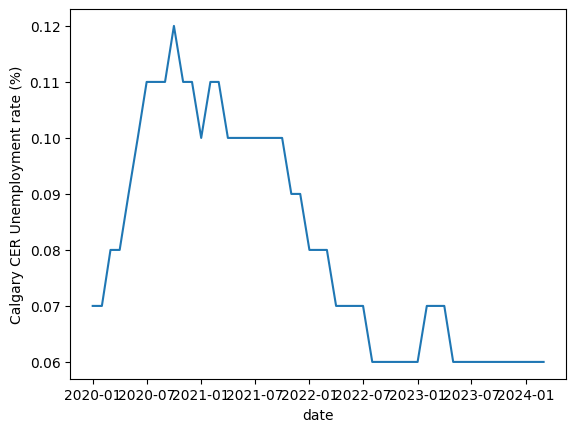

In [ ]:
#"Creating a lineplot regarding date vs Calgary CER Unemployment rate(%)"
sns.lineplot(data = Unemployment_rate, x=Unemployment_rate.index, y= Unemployment_rate["Calgary CER Unemployment rate (%)"])

In [ ]:
# Determinate the target dates, unemployment rate for "n" previous weeks.
def date_time(date_str):
    return pd.to_datetime(date_str, errors = "coerce")
def df_to_order( f_date_str, l_date_str):
    f_date_str = date_time(f_date_str)
    l_date_str = date_time(l_date_str)
    target_date = f_date_str
    return f_date_str, l_date_str, target_date
def target_dates(dataframe, target_date, last_date, n=3):
    dates = []
    x_values, y_values = [], []

    while target_date <= last_date:
        df_subset = dataframe[dataframe["Date"] >= target_date]
        df_subset = df_subset.head(n+1)

        if len(df_subset) != n + 1:
            print(f"Warning: Insufficient data for target date {target_date}. Skipping.")
            target_date += datetime.timedelta(days=7)  # Skip to the next target date
            continue

        values = df_subset["Calgary CER Unemployment rate (%)"].to_numpy()
        x_values.append(values[:-1])
        y_values.append(values[-1])
        dates.append(target_date)

        target_date += datetime.timedelta(days=7)  # Update target for next iteration

    ret_df = pd.DataFrame({})
    ret_df["Target Date"] = dates
    for i in range(n):
        ret_df[f"Target-{n-i}"] = [x[i] for x in x_values]
    ret_df["Target"] = y_values
    return ret_df

# Sample DataFrame
date_range = pd.date_range(start="2020-01-01", end="2024-03-01", freq="D")
Unemployment_rates = np.random.rand(len(date_range)) * 100
data = {
    "Date": date_range,
    "Calgary CER Unemployment rate (%)": Unemployment_rates
}
df = pd.DataFrame(data)

# Define the start and end date strings
f_date_str = "2020-01-01"
l_date_str = "2024-03-01"

f_date, l_date, target_date = df_to_order(f_date_str, l_date_str)
result_df = target_dates(df, target_date, l_date)

print(result_df)

    Target Date   Target-3   Target-2   Target-1     Target
0    2020-01-01  37.050729   4.250059  18.189455  62.339969
1    2020-01-08  74.149947  41.968356  46.638800  55.930936
2    2020-01-15  41.172507  23.412517  58.096611  31.051100
3    2020-01-22   1.381202  26.950415   3.081401  15.249332
4    2020-01-29  68.932113  86.574652   7.480357  93.476921
..          ...        ...        ...        ...        ...
212  2024-01-24  27.474279  62.522140  98.294097  60.680057
213  2024-01-31  89.727133  30.967185  53.820759  56.785069
214  2024-02-07  95.807180  35.103389  69.994332  93.996047
215  2024-02-14  69.912660  26.883763  83.445871  10.283407
216  2024-02-21  47.343799  18.512303  97.672112  36.424550

[217 rows x 5 columns]


In [ ]:
#Calculate the shape of each data
def values_to_date(values_dataframe):
    df_as_np = values_dataframe.to_numpy()
    date = df_as_np[:,0]
    middle_matrix = df_as_np[:, 1:-1]
    x = middle_matrix.reshape((len(date), middle_matrix.shape[1],1))
    y = df_as_np[:,-1]
    return date, x.astype(np.float32), y.astype(np.float32)
date,x,y = values_to_date(result_df)
date.shape, x.shape, y.shape

((217,), (217, 3, 1), (217,))

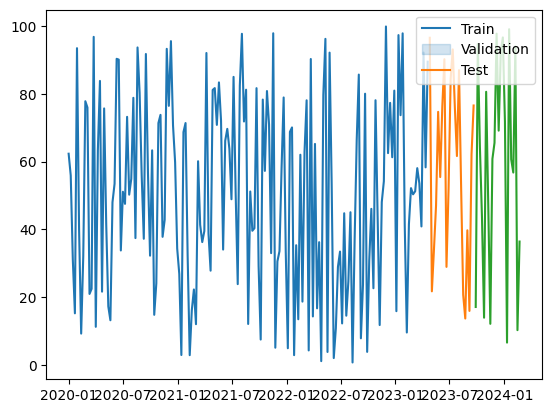

In [ ]:
# Graph representing the train data, validation, and test
D_80 = int(len(date)* .8)
D_90 = int(len(date)* .9)

dates_train, x_train, y_train = date[:D_80], x[:D_80], y[:D_80]
dates_val, x_val, y_val = date[D_80:D_90], x[D_80:D_90], y[D_80:D_90]
dates_test, x_test, y_test = date[D_90:], x[D_90:], y[D_90:]
sns.lineplot(x = dates_train, y = y_train, label = "Train" )
sns.lineplot(x = dates_val, y = y_val, label = "Validation")
sns.lineplot(x = dates_test, y = y_test, label = "Test")
plt.legend(labels= ["Train","Validation","Test"], loc = "upper right")
plt.show()

In [ ]:
# Initialize a linear stock of lyers for the neuronal network
model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation = "relu"),
                    layers.Dense(32, activation = "relu"),
                    layers.Dense(1)])
# Configuring the model for training
model.compile(loss = "mse", optimizer = Adam(learning_rate= 0.001),
              metrics = ["mean_absolute_error"])
model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs= 100)


Epoch 1/100
6/6 [==============================] - 4s 172ms/step - loss: 3287.6492 - mean_absolute_error: 50.0392 - val_loss: 3903.9397 - val_mean_absolute_error: 56.7667
Epoch 2/100
6/6 [==============================] - 0s 21ms/step - loss: 3227.4209 - mean_absolute_error: 49.4310 - val_loss: 3831.1382 - val_mean_absolute_error: 56.1206
Epoch 3/100
6/6 [==============================] - 0s 24ms/step - loss: 3162.7471 - mean_absolute_error: 48.7735 - val_loss: 3747.8669 - val_mean_absolute_error: 55.3762
Epoch 4/100
6/6 [==============================] - 0s 22ms/step - loss: 3088.1799 - mean_absolute_error: 48.0260 - val_loss: 3652.4844 - val_mean_absolute_error: 54.5163
Epoch 5/100
6/6 [==============================] - 0s 21ms/step - loss: 2996.9243 - mean_absolute_error: 47.1136 - val_loss: 3526.4299 - val_mean_absolute_error: 53.3584
Epoch 6/100
6/6 [==============================] - 0s 18ms/step - loss: 2882.5679 - mean_absolute_error: 45.9554 - val_loss: 3367.2766 - val_mean_abs

6/6 [==============================] - 2s 4ms/step


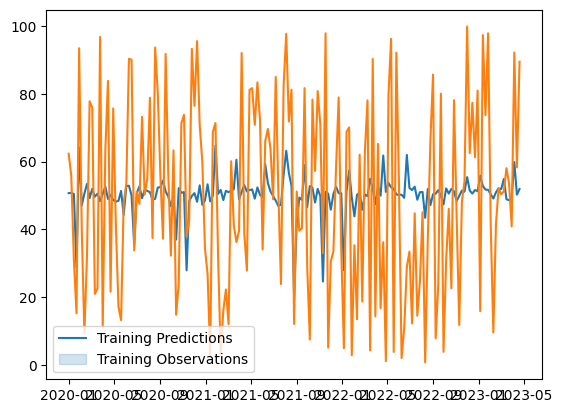

In [ ]:
# Generate prediction using the trained model on the training dataset
train_predictions = model.predict(x_train).flatten()

sns.lineplot(x = dates_train, y = train_predictions)
sns.lineplot(x = dates_train, y =  y_train)
plt.legend(["Training Predictions", "Training Observations"])

1/1 [==============================] - 0s 90ms/step


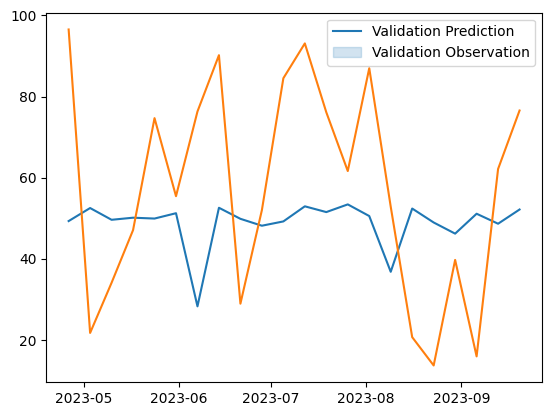

In [ ]:
# visuzlize how well  the models predictions align with the actual observations on the validation dataset
val_predictions = model.predict(x_val).flatten()

sns.lineplot(x = dates_val, y = val_predictions)
sns.lineplot(x = dates_val, y = y_val)
plt.legend(["Validation Prediction", "Validation Observation"])

1/1 [==============================] - 0s 60ms/step


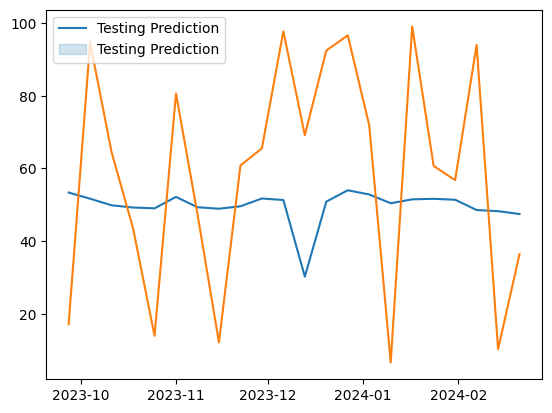

In [ ]:
# Predictions comparing the performance with the actual observations
test_predictions = model.predict(x_test).flatten()

sns.lineplot(x = dates_test, y = test_predictions)
sns.lineplot(x = dates_test, y = y_test)
plt.legend(["Testing Prediction", "Testing Prediction"])

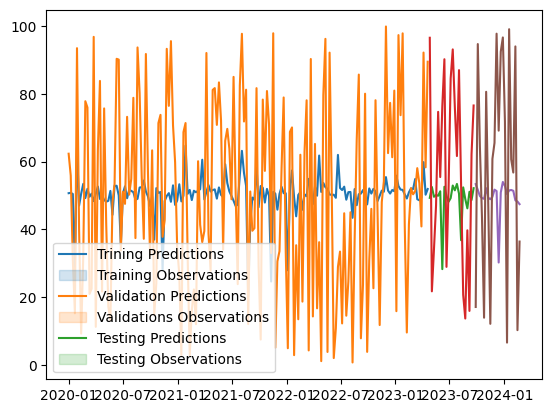

In [ ]:
# Compare the models predictions  to the actual observations across  different datasets, providing insights into the model performance
sns.lineplot(x = dates_train, y =train_predictions)
sns.lineplot(x = dates_train, y = y_train)
sns.lineplot(x = dates_val, y = val_predictions)
sns.lineplot(x = dates_val, y = y_val)
sns.lineplot(x = dates_test, y = test_predictions)
sns.lineplot(x = dates_test, y = y_test)
plt.legend(["Trining Predictions", "Training Observations", "Validation Predictions", "Validations Observations", "Testing Predictions", "Testing Observations"])